In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cell 2: Upload dataset from your local system
from google.colab import files
uploaded = files.upload()


Saving housing.csv to housing.csv


In [3]:
# Cell 3: Load the CSV file into a DataFrame and check for missing values
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print(df.info())
print("\nMissing values in each column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None

Missing values in each column:
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [4]:
# Cell 4: Prepare features and target
df = df.drop('Address', axis=1)  # Drop non-numeric column

X = df.drop('Price', axis=1)
y = df['Price']


In [5]:
# Cell 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (4000, 5)
Testing data shape: (1000, 5)


In [6]:
# Cell 6: Train and evaluate KNN models with different k values
k_values = [3, 5, 7]
results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({'k': k, 'MAE': mae, 'MSE': mse, 'RMSE': rmse})
    print(f"k = {k} -> MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")


k = 3 -> MAE: 212501.22, MSE: 68667790171.76, RMSE: 262045.40
k = 5 -> MAE: 203987.47, MSE: 63314173405.03, RMSE: 251623.08
k = 7 -> MAE: 199291.75, MSE: 60817722367.28, RMSE: 246612.49


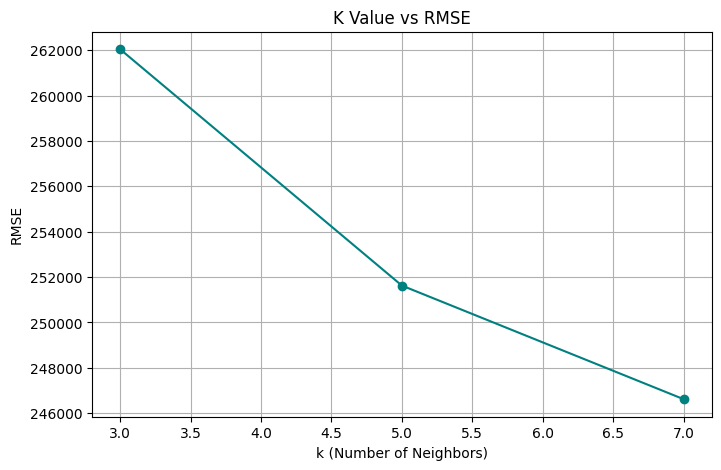

In [7]:
# Cell 7: Visualize k vs RMSE
rmse_values = [r['RMSE'] for r in results]
plt.figure(figsize=(8, 5))
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='teal')
plt.title('K Value vs RMSE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()
